In [3]:
import pandas as pd

df = pd.read_parquet("nba_rating/data/raw/player_gamelog_2014-15.parquet")
df.tail()


,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
25976,22014,201565,Derrick Rose,1610612741,CHI,Chicago Bulls,0021401217,2015-04-15,CHI vs. ATL,W,...,2,1,0,0,4,0,2,-11,1.9,1
25977,22014,203210,JaMychal Green,1610612763,MEM,Memphis Grizzlies,0021401220,2015-04-15,MEM vs. IND,W,...,1,0,0,0,0,0,0,-1,1.2,1
25978,22014,203145,Kent Bazemore,1610612737,ATL,Atlanta Hawks,0021401217,2015-04-15,ATL @ CHI,L,...,2,0,0,1,1,1,3,-8,7.4,1
25979,22014,203515,Phil Pressey,1610612738,BOS,Boston Celtics,0021401221,2015-04-15,BOS @ MIL,W,...,5,7,0,0,1,1,5,6,20.5,1
25980,22014,201595,Joey Dorsey,1610612745,HOU,Houston Rockets,0021401219,2015-04-15,HOU vs. UTA,W,...,3,1,0,0,1,0,3,-10,7.1,1


In [4]:
import pandas as pd
from pathlib import Path

# 1) Charger le fichier final
path = Path("nba_rating/data/curated/all_seasons_scores.parquet")
df = pd.read_parquet(path)

# 2) Contrôles basiques
print("✔️ Nombre total de lignes :", len(df))
print("✔️ Score min :", df["score_100"].min())
print("✔️ Score max :", df["score_100"].max())
print("✔️ Valeurs manquantes dans score_100 :", df["score_100"].isna().sum())

# 3) Récapitulatif par saison
summary = df.groupby("season")["score_100"].agg(["count", "min", "max", "mean"])
print("\n📊 Récapitulatif par saison :")
print(summary)


✔️ Nombre total de lignes : 5310
✔️ Score min : 0.0
✔️ Score max : 100.0
✔️ Valeurs manquantes dans score_100 : 0

📊 Récapitulatif par saison :
         count  min    max       mean
season                               
2014-15    492  0.0  100.0  46.608289
2015-16    477  0.0  100.0  36.882880
2016-17    486  0.0  100.0  36.767619
2017-18    540  0.0  100.0  36.545478
2018-19    530  0.0  100.0  36.678808
2019-20    529  0.0  100.0  31.230596
2020-21    540  0.0  100.0  42.465509
2021-22    605  0.0  100.0  44.211587
2022-23    539  0.0  100.0  50.093558
2023-24    572  0.0  100.0  36.258227


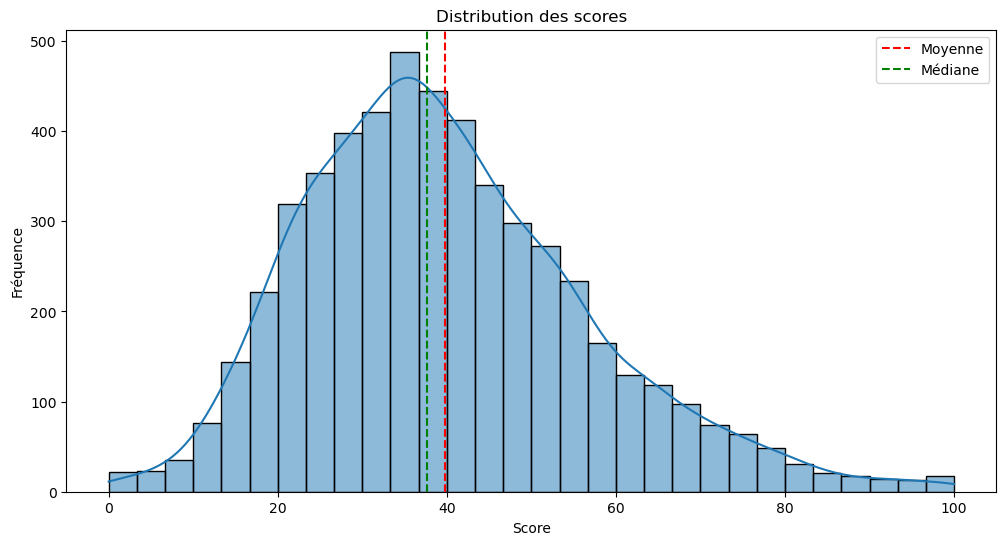

In [5]:
# graphique
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df["score_100"], bins=30, kde=True)
plt.title("Distribution des scores")
plt.xlabel("Score")
plt.ylabel("Fréquence")
plt.axvline(df["score_100"].mean(), color="red", linestyle="--", label="Moyenne")
plt.axvline(df["score_100"].median(), color="green", linestyle="--", label="Médiane")
plt.legend()
plt.show()
